<a href="https://colab.research.google.com/github/HeshanChen/EdenScope/blob/main/EdenScope_VL_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Environment Setup

In [8]:
!pip install pillow-heif
!pip install rawpy imageio

# Import necessary libraries
import os
from PIL import Image
import pillow_heif
import shutil
import glob
import matplotlib.pyplot as plt
import rawpy
import imageio

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Image Preprocessing

In [10]:
# Define the paths
import glob
input_folder = '/content/drive/MyDrive/EdenScope/leaf/'  # Leaf folder
output_folder = '/content/drive/MyDrive/EdenScope/processed_images/'         # Folder to save processed images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Desired image size (width, height)
image_size = (2048, 2048)  # Adjust the dimensions as needed

Process the images:

In [11]:
# Get list of HEIC, JPEG, and DNG images
heic_files = glob.glob(os.path.join(input_folder, '*.heic')) + glob.glob(os.path.join(input_folder, '*.HEIC'))
jpeg_files = glob.glob(os.path.join(input_folder, '*.jpg')) + glob.glob(os.path.join(input_folder, '*.jpeg')) + glob.glob(os.path.join(input_folder, '*.JPG')) + glob.glob(os.path.join(input_folder, '*.JPEG'))
dng_files = glob.glob(os.path.join(input_folder, '*.dng')) + glob.glob(os.path.join(input_folder, '*.DNG'))

print(f"Found {len(heic_files)} HEIC images.")
print(f"Found {len(jpeg_files)} JPEG images.")
print(f"Found {len(dng_files)} DNG images.")

processed_images = []

# Initialize image counter
image_counter = 1

# Function to process and augment images
def process_and_augment_image(image, base_name):
    global image_counter  # Use the global image_counter variable

    # Resize image
    image = image.resize(image_size)

    # Rename and save the resized image
    new_base_name = f"{image_counter}"
    jpeg_path = os.path.join(output_folder, f'{new_base_name}.jpg')
    image.save(jpeg_path, 'JPEG')
    processed_images.append(jpeg_path)

    # Data augmentation: Rotate the image by 90°, 180°, and 270°
    for angle in [90, 180, 270]:
        rotated_image = image.rotate(angle, expand=True)
        rotated_image = rotated_image.resize(image_size)
        rotated_image_path = os.path.join(output_folder, f'{new_base_name}_rotated_{angle}.jpg')
        rotated_image.save(rotated_image_path, 'JPEG')
        processed_images.append(rotated_image_path)

    # Increment the image counter
    image_counter += 1

# Process HEIC images
for heic_file in heic_files:
    try:
        # Open HEIC image
        heif_file = pillow_heif.read_heif(heic_file)
        image = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw",
        )

        # Convert to RGB if necessary
        if image.mode != 'RGB':
            image = image.convert('RGB')

        base_name = os.path.splitext(os.path.basename(heic_file))[0]

        # Process and augment image
        process_and_augment_image(image, base_name)

    except Exception as e:
        print(f"Error processing {heic_file}: {e}")

# Process JPEG images
for jpeg_file in jpeg_files:
    try:
        # Open JPEG image
        image = Image.open(jpeg_file).convert('RGB')

        base_name = os.path.splitext(os.path.basename(jpeg_file))[0]

        # Process and augment image
        process_and_augment_image(image, base_name)

    except Exception as e:
        print(f"Error processing {jpeg_file}: {e}")

# Process DNG images
for dng_file in dng_files:
    try:
        # Open DNG image using rawpy
        with rawpy.imread(dng_file) as raw:
            rgb_image = raw.postprocess()

        # Convert the NumPy array to PIL Image
        image = Image.fromarray(rgb_image)

        base_name = os.path.splitext(os.path.basename(dng_file))[0]

        # Process and augment image
        process_and_augment_image(image, base_name)

    except Exception as e:
        print(f"Error processing {dng_file}: {e}")

print("Image preprocessing and augmentation completed.")
print(f"Total processed images: {len(processed_images)}")


Found 354 HEIC images.
Found 0 JPEG images.
Found 198 DNG images.
Image preprocessing and augmentation completed.
Total processed images: 2208


Step 3: Verify Processed Images

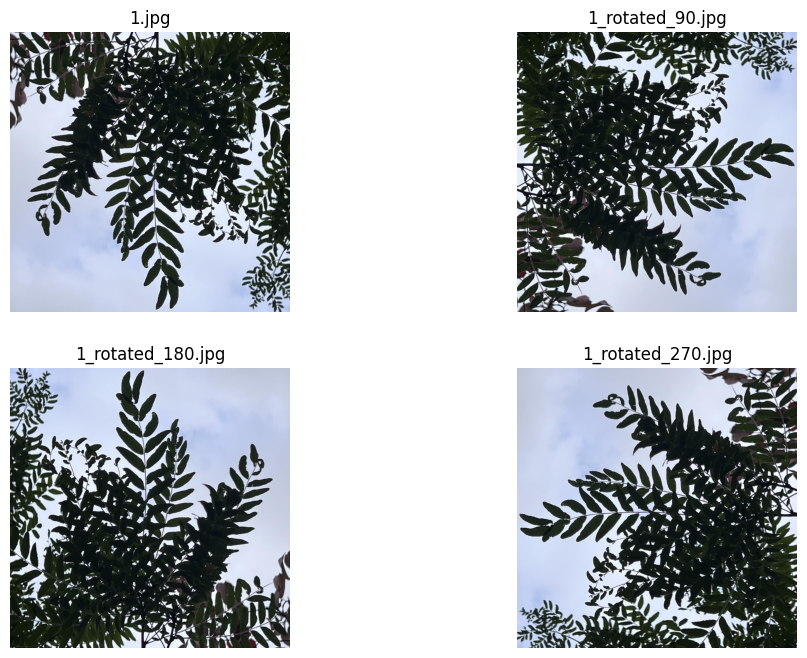

In [12]:
# Display a few sample images
import matplotlib.pyplot as plt

# Display a few sample images
def display_images(images, num_images=4):
    plt.figure(figsize=(12, 8))
    for i, image_path in enumerate(images[:num_images]):
        img = Image.open(image_path)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Display sample images
display_images(processed_images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')